Step 1: Load and Inspect Data

In [141]:
import pandas as pd

# Paths to the individual CSV files
user_details_path = "C:/Users/DELL/Downloads/UserDetails.csv"
cooking_sessions_path = "C:/Users/DELL/Downloads/CookingSessions.csv"
order_details_path = "C:/Users/DELL/Downloads/OrderDetails.csv"

In [143]:
# Load the datasets
user_details = pd.read_csv(user_details_path)
cooking_sessions = pd.read_csv(cooking_sessions_path)
order_details = pd.read_csv(order_details_path)

In [145]:
# Display a preview of the dataframes
print("User Details:")
print(user_details.head())

User Details:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        15-01-2023  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        20-02-2023  987-654-3210   
2    U003    Charlie Lee   42        Chicago        10-03-2023  555-123-4567   
3    U004    David Brown   27  San Francisco        05-04-2023  444-333-2222   
4    U005     Emma White   30        Seattle        22-05-2023  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [147]:
print("\nCooking Sessions:")
print(cooking_sessions.head())


Cooking Sessions:
  Session ID User ID        Dish Name  Meal Type     Session Start  \
0       S001    U001        Spaghetti     Dinner  2024-12-01 19:00   
1       S002    U002     Caesar Salad      Lunch  2024-12-01 12:00   
2       S003    U003  Grilled Chicken     Dinner  2024-12-02 19:30   
3       S004    U001         Pancakes  Breakfast  2024-12-02 07:30   
4       S005    U004     Caesar Salad      Lunch  2024-12-03 13:00   

        Session End  Duration (mins)  Session Rating  
0  2024-12-01 19:30               30             4.5  
1  2024-12-01 12:20               20             4.0  
2  2024-12-02 20:10               40             4.8  
3  2024-12-02 08:00               30             4.2  
4  2024-12-03 13:15               15             4.7  


In [149]:
print("\nOrder Details:")
print(order_details.head())


Order Details:
   Order ID User ID  Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001  2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002  2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003  2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001  2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004  2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  


In [151]:
# Check for missing values
print("\nMissing Values:")
print("UserDetails:", user_details.isnull().sum())
print("CookingSessions:", cooking_sessions.isnull().sum())
print("OrderDetails:", order_details.isnull().sum())


Missing Values:
UserDetails: User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
CookingSessions: Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
OrderDetails: Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [153]:
# Check data types
print("\nData Types:")
print("UserDetails:", user_details.dtypes)
print("CookingSessions:", cooking_sessions.dtypes)
print("OrderDetails:", order_details.dtypes)


Data Types:
UserDetails: User ID              object
User Name            object
Age                   int64
Location             object
Registration Date    object
Phone                object
Email                object
Favorite Meal        object
Total Orders          int64
dtype: object
CookingSessions: Session ID          object
User ID             object
Dish Name           object
Meal Type           object
Session Start       object
Session End         object
Duration (mins)      int64
Session Rating     float64
dtype: object
OrderDetails: Order ID          int64
User ID          object
Order Date       object
Meal Type        object
Dish Name        object
Order Status     object
Amount (USD)    float64
Time of Day      object
Rating          float64
Session ID       object
dtype: object


Step 2: Clean the Data

Ensure the data is consistent and ready for analysis.

In [157]:
# Handle missing values (example: filling or dropping rows)
user_details.dropna(inplace=True)
cooking_sessions.dropna(inplace=True)
order_details.dropna(inplace=True)

In [159]:
# Standardize column names for uniformity
user_details.columns = user_details.columns.str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.lower().str.replace(' ', '_')

In [161]:
# Remove duplicates
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

Step 3: Merge the Data

Combine datasets for analysis.

In [165]:
# Merge datasets using common keys
merged_data = pd.merge(cooking_sessions, user_details, on='user_id', how='inner')
merged_data = pd.merge(merged_data, order_details, on='session_id', how='inner')

In [167]:
# Inspect the merged dataset
print("Merged Dataset:")
print(merged_data.head())

Merged Dataset:
  session_id user_id_x   dish_name_x meal_type_x     session_start  \
0       S001      U001     Spaghetti      Dinner  2024-12-01 19:00   
1       S002      U002  Caesar Salad       Lunch  2024-12-01 12:00   
2       S004      U001      Pancakes   Breakfast  2024-12-02 07:30   
3       S005      U004  Caesar Salad       Lunch  2024-12-03 13:00   
4       S006      U002     Spaghetti      Dinner  2024-12-03 18:30   

        session_end  duration_(mins)  session_rating      user_name  age  ...  \
0  2024-12-01 19:30               30             4.5  Alice Johnson   28  ...   
1  2024-12-01 12:20               20             4.0      Bob Smith   35  ...   
2  2024-12-02 08:00               30             4.2  Alice Johnson   28  ...   
3  2024-12-03 13:15               15             4.7    David Brown   27  ...   
4  2024-12-03 19:00               30             4.3      Bob Smith   35  ...   

  total_orders order_id user_id_y  order_date meal_type_y   dish_name_y  \
0

Step 4: Rename Columns for Consistency

In [170]:
# Rename columns for clarity
merged_data = merged_data.rename(columns={
    'user_id_x': 'user_id',
    'dish_name_x': 'session_dish',
    'meal_type_x': 'session_meal',
    'user_id_y': 'user_id_order',
    'dish_name_y': 'order_dish',
    'meal_type_y': 'order_meal'
})

Step 5: Drop Unnecessary Columns

In [173]:
# Drop duplicate or unnecessary columns
merged_data = merged_data.drop(columns=['user_id_order'])

Step 6: Analyze the Relationship Between Sessions and Orders

In [176]:
# Group data by user_id to analyze sessions and orders
sessions_orders_relation = merged_data.groupby('user_id').agg({
    'session_id': 'nunique',  # Count unique session IDs
    'order_id': 'nunique'     # Count unique order IDs
}).rename(columns={'session_id': 'num_sessions', 'order_id': 'num_orders'})

# Check the correlation between sessions and orders
print("Sessions and Orders Relationship:")
print(sessions_orders_relation)
print("Correlation between sessions and orders:")
print(sessions_orders_relation.corr())

Sessions and Orders Relationship:
         num_sessions  num_orders
user_id                          
U001                3           3
U002                3           3
U003                1           1
U004                2           2
U005                2           2
U006                1           1
U007                1           1
U008                1           1
Correlation between sessions and orders:
              num_sessions  num_orders
num_sessions           1.0         1.0
num_orders             1.0         1.0


Step 7: Identify Popular Dishes

In [179]:
# Most popular dishes
popular_dishes = merged_data['order_dish'].value_counts().head(5)
print("Most Popular Dishes:")
print(popular_dishes)

Most Popular Dishes:
order_dish
Spaghetti          4
Caesar Salad       3
Grilled Chicken    3
Pancakes           2
Oatmeal            1
Name: count, dtype: int64


In [181]:
print(merged_data.columns)

Index(['session_id', 'user_id', 'session_dish', 'session_meal',
       'session_start', 'session_end', 'duration_(mins)', 'session_rating',
       'user_name', 'age', 'location', 'registration_date', 'phone', 'email',
       'favorite_meal', 'total_orders', 'order_id', 'order_date', 'order_meal',
       'order_dish', 'order_status', 'amount_(usd)', 'time_of_day', 'rating'],
      dtype='object')


Step 8: Explore Demographic Factors

Orders by Age

In [185]:
# Analyze orders by age
age_group_analysis = merged_data.groupby('age')['order_id'].count()

print("Orders by Age Group:")
print(age_group_analysis)

Orders by Age Group:
age
25    1
27    2
28    3
30    2
31    1
35    3
38    1
42    1
Name: order_id, dtype: int64


Orders by Location

In [188]:
# Analyze orders by location
location_analysis = merged_data.groupby('location')['order_id'].count()

print("\nOrders by Location:")
print(location_analysis)


Orders by Location:
location
Austin           1
Boston           1
Chicago          1
Los Angeles      3
Miami            1
New York         3
San Francisco    2
Seattle          2
Name: order_id, dtype: int64


Orders by Favorite Meal

In [191]:
# Analyze orders by favorite meal
favorite_meal_analysis = merged_data.groupby('favorite_meal')['order_id'].count()

print("\nOrders by Favorite Meal:")
print(favorite_meal_analysis)


Orders by Favorite Meal:
favorite_meal
Breakfast    2
Dinner       7
Lunch        5
Name: order_id, dtype: int64


Step 9: Create Visualizations

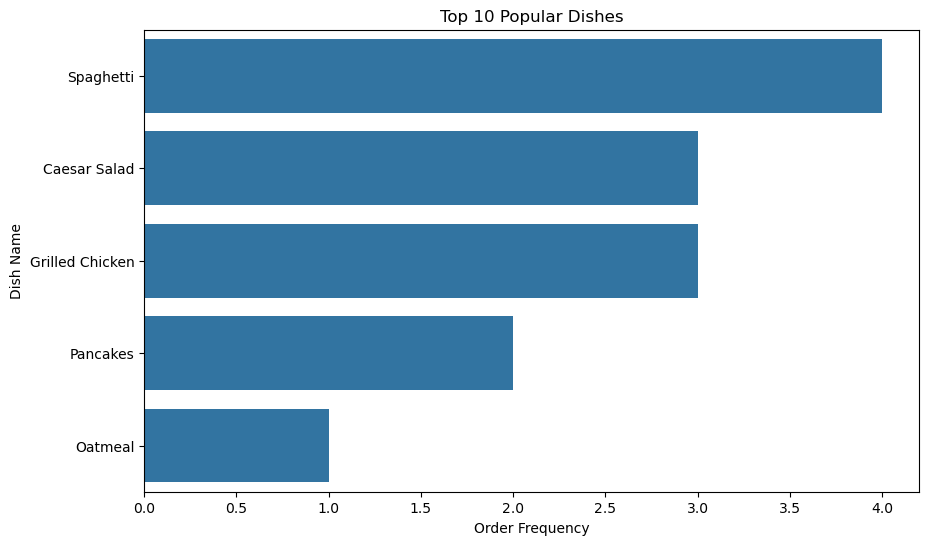

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Popular dishes visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index)
plt.title('Top 10 Popular Dishes')
plt.xlabel('Order Frequency')
plt.ylabel('Dish Name')
plt.show()

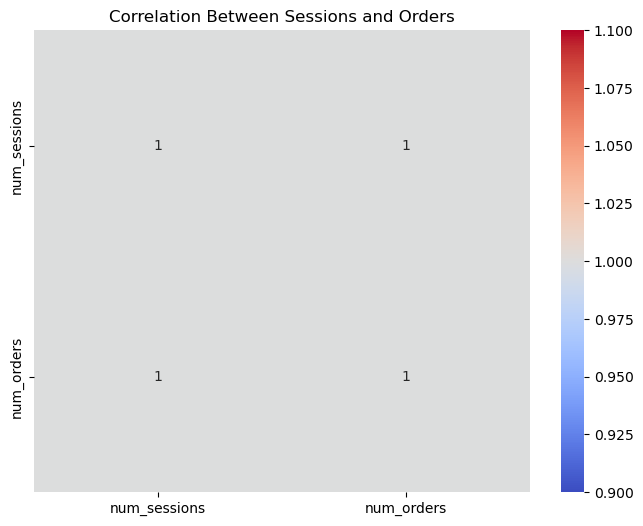

In [196]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sessions_orders_relation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Sessions and Orders')
plt.show()